# Exercise Sheet 1a



### Read the Dataset

- Use Pandas to read the 'covertype.csv' file
- The dataset contains information on different forest cover types
- Look at the columns. Which of them contain meaningful features?



### Seperate Features and Labels
- Define x as the vectors of meaningful features
- Define y as the labels (Cover_Type)



### Split the dataset into two disjoint datasets for training and testing
- Randomly split the dataset. Use 70% for training and 30% for testing.
- Define x_train and x_test as the feature vectors
- Define y_train and y_test as the labels
    - Hint: Have a look at the sklearn package

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('covertype.csv')

In [3]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [15]:
# Checking if any of the column contains null data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [16]:
x = df.drop(['Id', 'Cover_Type'], axis=1)

In [17]:
y = df['Cover_Type']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [19]:
x_train_pd = x_train
x_test_pd = x_test

### Train a simple deep neural network
- Use Pytorch to define a simple Multi-Layer Perceptron with at least 3 layers
    - The input layer should have as many neurons as there are features
        - How many features are there?
    - The last layer should have as many neurons as there are classes
        - How many classes are there?
- Pack your training and testing datasets in a class which inherits from torch.utils.data.Datset
    - features you input to your network should be of type torch.float
    - labels should be of type torch.long.
- Use a torch.utils.data.DataLoader to access your data in batches
- Train the MLP with your data from the train_loader using Cross-Entropy Loss and the Adam Optimizer
    - Make sure to save the training history for later assessment
- Evaluate the performance on your test_loader

In [20]:
import numpy as np
x_train_np = np.array(x_train)
y_train_np = np.array(y_train)


In [21]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch.nn as nn
import torch.nn.functional as F

x_train_t = torch.from_numpy(x_train_np)
y_train_t = torch.from_numpy(y_train_np)

x_train_t = x_train_t.type(torch.FloatTensor)
#y_train_t = y_train_t -1

train_ds = TensorDataset(x_train_t, y_train_t)


# Define your MLP

class MLPModel(nn.Module):
  def __init__(self, in_size, hidden_size, out_size):
    super().__init__()
    self.linear1 = nn.Linear(in_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size, 20)
    self.linear3 = nn.Linear(20, out_size)


  def forward(self, xb):
    out = self.linear1(xb)
    out = F.relu(out)
    out = self.linear2(out)
    out = F.relu(out)
    out = self.linear3(out)
    out = F.softmax(out, dim=1)

    return out


In [22]:
# Create your DataLoaders
batch_size = 128

train_loader = DataLoader(dataset=train_ds,batch_size=128)



In [23]:
# Instantiate the network, the optimizer and the Loss Criterion

input_size = x_train.shape[1]
num_classes = len(np.unique(y_train))

net = MLPModel(input_size, hidden_size=32, out_size=num_classes)

criterion = F.cross_entropy

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)



In [24]:
# Define your training Loop
def train_epoch(model, dataloader, criterion, optimizer):
    model.train()
    epoch_loss = 0
    correct = 0.
    samples = 0.
    for sample in dataloader:
        optimizer.zero_grad()
        data, label = sample
        prediction = model(data)
        loss = criterion(prediction, label)
        correct += sum(torch.argmax(prediction, dim=1) == label)
        samples += len(data)
        epoch_loss += loss.data
        loss.backward()
        optimizer.step()
    return epoch_loss, correct/samples


# Define your testing Loop
def test_epoch(model, dataloader, criterion):
    model.eval()
    epoch_loss = 0
    correct = 0.
    samples = 0.
    for sample in dataloader:
        data, label = sample
        prediction = model(data)
        loss = criterion(prediction, label)
        correct += sum(torch.argmax(prediction, dim=1) == label)
        samples += len(data)
        epoch_loss += loss.data
    return epoch_loss, correct/samples
    


In [25]:
# Check if your training and testing loops are working
train_epoch(net, train_loader, criterion, optimizer)
test_epoch(net, train_loader, criterion)


IndexError: ignored

### Debug
- If there is a RuntimeError raised in you loss function, either your network architecture or your data is faulty
    - Check your network architecture
    - Check your data
        - Are there any NaN or infinite features or labels?
    - Print the labels.
        - How many unique labels do you have?
        - Are they [0, ..., n-1]?
            - If not, align them

In [26]:
# Inspect your data
import numpy as np

print('Unique values in labels:', np.unique(y_train_t))
print(f'There are in all {len(torch.unique(y_train_t))} unique labels')
print('Changing the range of labels from 1-7 to 0-6')
y_train_tt = y_train_t - 1
print('Unique values in labels:', np.unique(y_train_tt))



Unique values in labels: [1 2 3 4 5 6 7]
There are in all 7 unique labels
Changing the range of labels from 1-7 to 0-6
Unique values in labels: [0 1 2 3 4 5 6]


In [27]:
# Fix your data and recreate your DataLoaders
train_ds = TensorDataset(x_train_t, y_train_tt)

train_loader = DataLoader(train_ds, batch_size)


### Train your Network
- Reinitialize your MLP from above and train it for 100 epochs

In [28]:
import tqdm

net = MLPModel(input_size, hidden_size=32, out_size=num_classes)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

train_loss, train_accuracy = [], []
test_loss, test_accuracy = [], []

for i in tqdm.tnrange(100):
    loss, accuracy = train_epoch(net, train_loader, criterion, optimizer)
    train_loss.append(loss)
    train_accuracy.append(accuracy)
    loss, accuracy = test_epoch(net, train_loader, criterion)
    test_loss.append(loss)
    test_accuracy.append(accuracy)
    print("test_accuracy , loss", accuracy,loss)
    

    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  if __name__ == '__main__':


test_accuracy , loss tensor(0.2223) tensor(161.1113)
test_accuracy , loss tensor(0.2161) tensor(161.7909)
test_accuracy , loss tensor(0.2572) tensor(158.2123)
test_accuracy , loss tensor(0.2577) tensor(158.2413)
test_accuracy , loss tensor(0.2596) tensor(158.0461)
test_accuracy , loss tensor(0.2788) tensor(156.4633)
test_accuracy , loss tensor(0.2681) tensor(157.3179)
test_accuracy , loss tensor(0.2563) tensor(158.3269)
test_accuracy , loss tensor(0.2333) tensor(160.2509)
test_accuracy , loss tensor(0.2503) tensor(158.8258)
test_accuracy , loss tensor(0.2679) tensor(157.3901)
test_accuracy , loss tensor(0.2819) tensor(156.1268)
test_accuracy , loss tensor(0.2918) tensor(155.2596)
test_accuracy , loss tensor(0.2927) tensor(155.1178)
test_accuracy , loss tensor(0.2924) tensor(155.2366)
test_accuracy , loss tensor(0.3036) tensor(154.3626)
test_accuracy , loss tensor(0.2747) tensor(156.5992)
test_accuracy , loss tensor(0.2481) tensor(158.5960)
test_accuracy , loss tensor(0.2462) tensor(158

In [29]:
print(train_loss)

[tensor(161.6334), tensor(160.6408), tensor(160.6637), tensor(158.9384), tensor(158.4408), tensor(157.7468), tensor(157.5792), tensor(157.7281), tensor(157.1822), tensor(157.2923), tensor(156.4687), tensor(156.4681), tensor(157.2800), tensor(156.1773), tensor(156.1125), tensor(155.3430), tensor(155.8358), tensor(155.2698), tensor(155.1866), tensor(154.0431), tensor(154.2934), tensor(154.2330), tensor(153.8410), tensor(153.6406), tensor(153.1665), tensor(152.8935), tensor(152.5785), tensor(152.3730), tensor(152.2825), tensor(151.7263), tensor(151.4070), tensor(151.5216), tensor(151.4310), tensor(150.8500), tensor(150.9359), tensor(150.3936), tensor(151.2613), tensor(149.9202), tensor(150.5853), tensor(150.3788), tensor(150.2866), tensor(150.0898), tensor(149.8187), tensor(149.5913), tensor(150.0633), tensor(150.5534), tensor(149.6427), tensor(149.3920), tensor(149.4005), tensor(149.0115), tensor(148.7221), tensor(148.9657), tensor(148.8961), tensor(149.1837), tensor(148.3939), tensor(14

### Does it work?
- There should not be a RuntimeError raised now
- Does the network converge / Does the loss decrease? - NO


### Visualize the training
- use matplotlib.pyplot to visualize the history
- plot both the training accuracy and the validation accuracy
- Does the training stagnate?

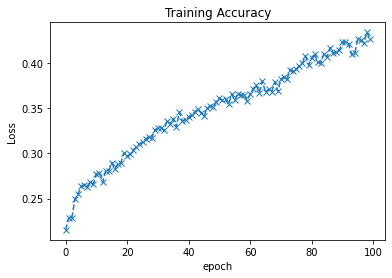

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train_accuracy, '--x')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Training Accuracy')
plt.show()

### Inspect the data
- Compute the min, max, mean and standard deviation of each feature
- What data type do the columns have?
- Use Pandas to print the statistics in a table
- What could be problematic with the dataset?

In [31]:
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

x_train_cols = x_train_pd.columns
stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"], index = x_train_cols)

# Compute the values for each column

x_train = pd.DataFrame(x_train_pd)

stats['Type'] = x_train.dtypes
stats['Min'] = x_train.min()
stats['Max'] = x_train.max()
stats['Mean'] = x_train.mean()
stats['Std'] = x_train.std()



display(stats)

,Type,Min,Max,Mean,Std
Elevation,int64,1874,3849,2751.45,418.98
Aspect,int64,0,360,155.73,110.12
Slope,int64,0,52,16.50,8.51
Horizontal_Distance_To_Hydrology,int64,0,1343,227.90,211.31
Vertical_Distance_To_Hydrology,int64,-123,547,51.06,61.62
Horizontal_Distance_To_Roadways,int64,0,6890,1713.08,1323.13
Hillshade_9am,int64,0,254,212.70,30.60
Hillshade_Noon,int64,99,254,218.77,22.95
Hillshade_3pm,int64,0,248,134.86,45.84
Horizontal_Distance_To_Fire_Points,int64,0,6993,1517.32,1107.53


### Preprocess the Data
- Normalize or standardize your data, so all features are at the same scale.
    - This will help your network to use all available features and not be biased by some features with large values
    - Does it make sense to normalize all columns, or only some?
- Hint: Again, look if you find something useful in sklearn


- Never use test data to optimize your training! This includes the preprocessing
    - Find preprocessing parameters on your training data only!
    - Transform all your data with the computed parameters
    - You have to remember which of your samples are used for training and which are for testing


In [32]:
from sklearn import preprocessing

#x_train_norm = preprocessing.Normalizer().fit(x_train)
scalar = preprocessing.MinMaxScaler()
x_train_norm = pd.DataFrame(scalar.fit_transform(x_train), columns=x_train.columns)

x_test_norm = pd.DataFrame(scalar.fit_transform(x_test_pd), columns=x_test_pd.columns)


### Inspect data again
- Print the statistics of the preprocessed data using the code from above

In [33]:
stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])

# Compute the values for each column
stats['Type'] = x_train_norm.dtypes
stats['Min'] = x_train_norm.min()
stats['Max'] = x_train_norm.max()
stats['Mean'] = x_train_norm.mean()
stats['Std'] = x_train_norm.std()


display(stats)

,Type,Min,Max,Mean,Std
Elevation,float64,0.00,1.00,0.44,0.21
Aspect,float64,0.00,1.00,0.43,0.31
Slope,float64,0.00,1.00,0.32,0.16
Horizontal_Distance_To_Hydrology,float64,0.00,1.00,0.17,0.16
Vertical_Distance_To_Hydrology,float64,0.00,1.00,0.26,0.09
Horizontal_Distance_To_Roadways,float64,0.00,1.00,0.25,0.19
Hillshade_9am,float64,0.00,1.00,0.84,0.12
Hillshade_Noon,float64,0.00,1.00,0.77,0.15
Hillshade_3pm,float64,0.00,1.00,0.54,0.18
Horizontal_Distance_To_Fire_Points,float64,0.00,1.00,0.22,0.16


### Train the network again
- Recreate your DataLoaders with the normalized data
- Reinitialize or your MLP from above and train it again


In [34]:
# Recreate your DataLoaders with the normalized data

x_train_t = torch.from_numpy(np.array(x_train_norm))
x_train_t = x_train_t.type(torch.FloatTensor)

x_train_ds = TensorDataset(x_train_t, y_train_tt)

train_loader = DataLoader(x_train_ds, batch_size)


In [35]:
x_test_t = torch.from_numpy(np.array(x_test_norm)) 
x_test_t = x_test_t.type(torch.FloatTensor)

y_test_t = torch.from_numpy(np.array(y_test))
y_test_tt = y_test_t -1

x_test_ds = TensorDataset(x_test_t, y_test_tt)
test_loader = DataLoader(x_test_ds, batch_size)

In [49]:
net = MLPModel(input_size, hidden_size=32, out_size=num_classes)
optimizer = torch.optim.Adam(net.parameters(), lr=0.0085)

train_losses, train_accuracys = [], []
test_losses, test_accuracys = [], []

for i in tqdm.tnrange(100):
    train_loss, train_accuracy = train_epoch(net, train_loader, criterion, optimizer)
    train_losses.append(train_loss)
    train_accuracys.append(train_accuracy)
    test_loss, test_accuracy = test_epoch(net, test_loader, criterion)
    test_losses.append(test_loss)
    test_accuracys.append(test_accuracy)
    print( train_loss, train_accuracy)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  import sys


tensor(143.4310) tensor(0.4335)
tensor(129.1376) tensor(0.6110)
tensor(127.5703) tensor(0.6276)
tensor(126.8839) tensor(0.6354)
tensor(126.3598) tensor(0.6387)
tensor(125.6336) tensor(0.6498)
tensor(124.8698) tensor(0.6588)
tensor(124.5719) tensor(0.6634)
tensor(124.4276) tensor(0.6651)
tensor(123.7677) tensor(0.6724)
tensor(123.1556) tensor(0.6800)
tensor(122.6880) tensor(0.6876)
tensor(122.9626) tensor(0.6836)
tensor(122.4545) tensor(0.6891)
tensor(122.1872) tensor(0.6922)
tensor(122.0293) tensor(0.6948)
tensor(121.8256) tensor(0.6945)
tensor(121.9741) tensor(0.6933)
tensor(121.8795) tensor(0.6954)
tensor(121.5590) tensor(0.7012)
tensor(121.1096) tensor(0.7059)
tensor(121.1836) tensor(0.7042)
tensor(120.8069) tensor(0.7096)
tensor(120.2091) tensor(0.7164)
tensor(120.0297) tensor(0.7188)
tensor(119.7905) tensor(0.7213)
tensor(119.4122) tensor(0.7272)
tensor(119.5174) tensor(0.7264)
tensor(118.9996) tensor(0.7306)
tensor(119.5030) tensor(0.7246)
tensor(119.2155) tensor(0.7294)
tensor(1

In [37]:
losss, accu = test_epoch(net, test_loader, criterion)

In [ ]:
accu

### Visualize the training
- use matplotlib.pyplot to visualize the history
- plot both the training accuracy and the validation accuracy

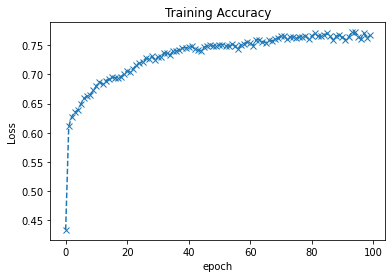

In [50]:
plt.plot(train_accuracys, '--x')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Training Accuracy')
plt.show()

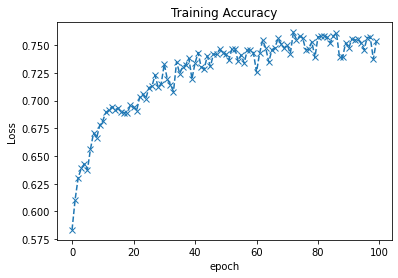

In [51]:
plt.plot(test_accuracys, '--x')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Training Accuracy')
plt.show()

In [ ]:
train_accuracys

In [ ]:
simple_net = 